In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

df_names = ['Aura_with_level1', 'Guillem_with_level1', 'Guillem_with_level2', 'Guillem_without_level2', 'Pau_with_level1', 'Fiona_with_level1', 'Oscar_with_level1', 'Salva_with_level1', 'Salva_with_level3','Pau_without_level2', 'Fiona_without_level2', 'Oscar_without_level2', 'Salva_without_level2' ]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


## DataFrame total

Primer el que farem és ajuntar tots els dataframes de 'Data/gazedata_csv_definitiu' en un sol i veurem les correlacions

In [98]:
df = pd.DataFrame()

for i in df_names:
    df_aux = pd.read_csv('Data/gazedata_csv_definitiu/'+i+'.csv')
    df = pd.concat([df, df_aux], ignore_index=True, sort=False)

df.to_csv('Data/gazedata_csv_definitiu/gazedata_total.csv', index=False)

In [99]:
df = df.drop(['timestamp'], axis=1)

### Correlació de tot

In [13]:
df.corr()

,gaze2d_x,gaze2d_y,eyeleft_pupildiameter,eyeright_pupildiameter,workload,workload_2
gaze2d_x,1.000000,0.387594,0.250790,0.403628,-0.067120,-0.014466
gaze2d_y,0.387594,1.000000,-0.048377,-0.008193,-0.082157,-0.044461
eyeleft_pupildiameter,0.250790,-0.048377,1.000000,0.534142,0.052265,0.061310
eyeright_pupildiameter,0.403628,-0.008193,0.534142,1.000000,0.073145,0.086064
workload,-0.067120,-0.082157,0.052265,0.073145,1.000000,0.864904
workload_2,-0.014466,-0.044461,0.061310,0.086064,0.864904,1.000000


<Axes: >

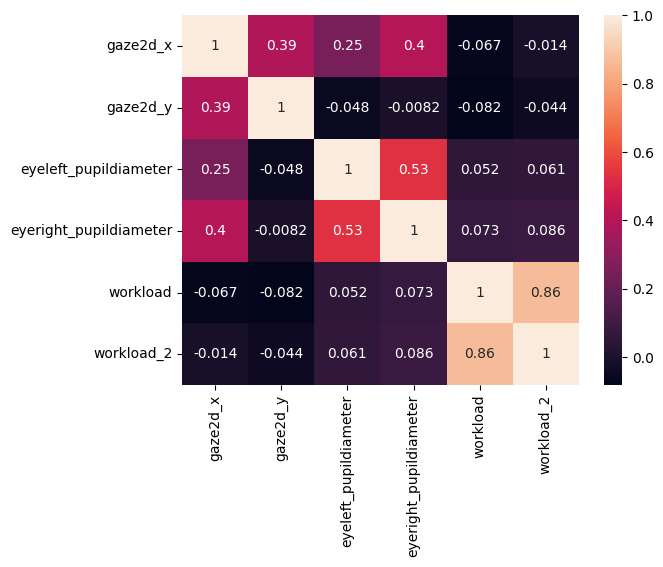

In [105]:
sns.heatmap(df.corr(), annot=True)

### Correlació separant per workloads

In [101]:
a = df[df['workload'] == 1]
a.corr()

,gaze2d_x,gaze2d_y,eyeleft_pupildiameter,eyeright_pupildiameter,workload,workload_2
gaze2d_x,1.000000,0.299155,0.182600,0.296361,NaN,0.022430
gaze2d_y,0.299155,1.000000,-0.124055,-0.151916,NaN,0.143856
eyeleft_pupildiameter,0.182600,-0.124055,1.000000,0.508611,NaN,0.003520
eyeright_pupildiameter,0.296361,-0.151916,0.508611,1.000000,NaN,0.026890
workload,NaN,NaN,NaN,NaN,NaN,NaN
workload_2,0.022430,0.143856,0.003520,0.026890,NaN,1.000000


## Variacions acumulades

Ara farem un dataframe amb les variacions acumulades de cada paràmetre. És a dir, si volem veure la variació acumulada d'una pupila en un minut agafarem 3600 frames, farem la diferència entre ells (primer amb segon, segon amb tercer...), un cop tenim les diferències sumem el valor absolut.

In [86]:
comparar = pd.DataFrame()
df = pd.read_csv('Data/gazedata_csv_definitiu/Aura_with_level1.csv')

n = 3600

df['gaze2d_x_diff'] = df['gaze2d_x'].diff().abs()
df['gaze2d_y_diff'] = df['gaze2d_y'].diff().abs()

distancia_x = df['gaze2d_x_diff'].rolling(window=n).sum().dropna().tolist()
distancia_y = df['gaze2d_y_diff'].rolling(window=n).sum().dropna().tolist()

df['eyeleft_pupildiameter_diff'] = df['eyeleft_pupildiameter'].diff().abs()
df['eyeright_pupildiameter_diff'] = df['eyeright_pupildiameter'].diff().abs()

dif_pupil_left = df['eyeleft_pupildiameter_diff'].rolling(window=n).sum().dropna().tolist()
dif_pupil_right = df['eyeright_pupildiameter_diff'].rolling(window=n).sum().dropna().tolist()

blinking_left = df['eyeleft_pupildiameter'].drop(index=0, axis=0).rolling(window=n).apply(lambda x: (x == 0).sum()).dropna().tolist()
blinking_right = df['eyeright_pupildiameter'].drop(index=0, axis=0).rolling(window=n).apply(lambda x: (x == 0).sum()).dropna().tolist()

workload = df['workload'].drop(index=0, axis=0).rolling(window=n).mean().round().dropna().tolist()
workload_2 = df['workload_2'].drop(index=0, axis=0).rolling(window=n).mean().round().dropna().tolist()

d = {
'distancia_x' : distancia_x,
'distancia_y' : distancia_y,
'dif_pupil_left' : dif_pupil_left,
'dif_pupil_right' : dif_pupil_right,
'blinking_left' : blinking_left,
'blinking_right': blinking_right,
'workload': workload,
'workload_2' : workload_2}

d = pd.DataFrame(d)
comparar = pd.concat([comparar, d], ignore_index=True, sort=False)

comparar.corr()

,distancia_x,distancia_y,dif_pupil_left,dif_pupil_right,blinking_left,blinking_right,workload,workload_2
distancia_x,1.000000,0.841021,0.601850,0.414778,0.624726,0.239857,0.405044,0.405044
distancia_y,0.841021,1.000000,0.601973,0.463648,0.750798,0.370817,0.211030,0.211030
dif_pupil_left,0.601850,0.601973,1.000000,0.625580,0.609283,-0.041805,0.273433,0.273433
dif_pupil_right,0.414778,0.463648,0.625580,1.000000,0.431382,0.444310,-0.016404,-0.016404
blinking_left,0.624726,0.750798,0.609283,0.431382,1.000000,0.496194,0.056203,0.056203
blinking_right,0.239857,0.370817,-0.041805,0.444310,0.496194,1.000000,-0.319246,-0.319246
workload,0.405044,0.211030,0.273433,-0.016404,0.056203,-0.319246,1.000000,1.000000
workload_2,0.405044,0.211030,0.273433,-0.016404,0.056203,-0.319246,1.000000,1.000000


In [90]:
comparar = pd.DataFrame()

for j in df_names:
    df = pd.read_csv('Data/gazedata_csv_definitiu/'+j+'.csv')

    n = 3600

    df['gaze2d_x_diff'] = df['gaze2d_x'].diff().abs()
    df['gaze2d_y_diff'] = df['gaze2d_y'].diff().abs()

    distancia_x = df['gaze2d_x_diff'].rolling(window=n).sum().dropna().tolist()
    distancia_y = df['gaze2d_y_diff'].rolling(window=n).sum().dropna().tolist()

    df['eyeleft_pupildiameter_diff'] = df['eyeleft_pupildiameter'].diff().abs()
    df['eyeright_pupildiameter_diff'] = df['eyeright_pupildiameter'].diff().abs()

    dif_pupil_left = df['eyeleft_pupildiameter_diff'].rolling(window=n).sum().dropna().tolist()
    dif_pupil_right = df['eyeright_pupildiameter_diff'].rolling(window=n).sum().dropna().tolist()

    blinking_left = df['eyeleft_pupildiameter'].drop(index=0, axis=0).rolling(window=n).apply(lambda x: (x == 0).sum()).dropna().tolist()
    blinking_right = df['eyeright_pupildiameter'].drop(index=0, axis=0).rolling(window=n).apply(lambda x: (x == 0).sum()).dropna().tolist()

    workload = df['workload'].drop(index=0, axis=0).rolling(window=n).mean().round().dropna().tolist()
    workload_2 = df['workload_2'].drop(index=0, axis=0).rolling(window=n).mean().round().dropna().tolist()

    d = {
    'distancia_x' : distancia_x,
    'distancia_y' : distancia_y,
    'dif_pupil_left' : dif_pupil_left,
    'dif_pupil_right' : dif_pupil_right,
    'blinking_left' : blinking_left,
    'blinking_right': blinking_right,
    'workload': workload,
    'workload_2' : workload_2}

    d = pd.DataFrame(d)
    comparar = pd.concat([comparar, d], ignore_index=True, sort=False)

In [82]:
len(df['eyeleft_pupildiameter'])

9033

In [91]:
comparar.corr()

,distancia_x,distancia_y,dif_pupil_left,dif_pupil_right,blinking_left,blinking_right,workload,workload_2
distancia_x,1.000000,0.993921,0.942989,0.950606,0.690812,0.951243,-0.168283,-0.132400
distancia_y,0.993921,1.000000,0.946176,0.935473,0.718919,0.937666,-0.189813,-0.151091
dif_pupil_left,0.942989,0.946176,1.000000,0.889094,0.782998,0.855090,-0.118396,-0.077737
dif_pupil_right,0.950606,0.935473,0.889094,1.000000,0.535932,0.978044,-0.178267,-0.136375
blinking_left,0.690812,0.718919,0.782998,0.535932,1.000000,0.540468,-0.074190,-0.067952
blinking_right,0.951243,0.937666,0.855090,0.978044,0.540468,1.000000,-0.224691,-0.199742
workload,-0.168283,-0.189813,-0.118396,-0.178267,-0.074190,-0.224691,1.000000,0.873400
workload_2,-0.132400,-0.151091,-0.077737,-0.136375,-0.067952,-0.199742,0.873400,1.000000


Ara veiem les combinacions lineals entre les variables

In [57]:
x = comparar['blinking_right']
y = comparar['blinking_left']
z = comparar['distancia_x']
i = comparar['distancia_y']
j = comparar['dif_pupil_right']
k = comparar['dif_pupil_left']
workload = comparar['workload']
workload_2 = comparar['workload_2']

In [58]:
parameters = [0, 1, -1]

num_combinations= len(parameters) ** 6

combinations = np.zeros((num_combinations, 6), dtype = int)

for i in range(num_combinations):
    index_ternary = np.base_repr(i, base=3)
    si = str(index_ternary)
    index_ternary = list( "0"*(6-len(si)) + si)
    
    combination = [parameters[int(digit)] for digit in index_ternary]
    combinations[i,:] = combination


In [67]:
correlacions = pd.DataFrame()

combinations_used= []
correlations = []
correlations_2 = []

for i in range(len(combinations)):
    comb_lineal = combinations[i][0]*x +  combinations[i][1]*y + combinations[i][2]*z + combinations[i][3]*i + combinations[i][4]*j + combinations[i][5]*k 
    df_aux = {'workload': workload, 'workload_2': workload_2, 'comb_lineal': comb_lineal}
    df_aux = pd.DataFrame(df_aux)
    combinations_used.append(combinations[i])
    # print(a.corr().iloc[0,1])
    correlations.append(df_aux.corr().iloc[0,2])
    correlations_2.append(df_aux.corr().iloc[1,2])


In [78]:
max = 0
max_2 = 0
for i in correlations:
    if i > max:
        max = i
for j in correlations_2:
    if j > max_2:
        max_2 = j

In [80]:
print(max)
print(combinations_used[correlations.index(max)])
print(max_2)
print(combinations_used[correlations_2.index(max_2)])


0.2351416683614798
[-1  0  1 -1  0  0]
0.22646120880617157
[-1 -1  0 -1 -1  1]


## Diferències

Ara el que mirarem seran les diferències entre diferents punts

In [88]:
df = pd.read_csv('Data/gazedata_csv_definitiu/Aura_with_level1.csv')

n = 30

df['gaze2d_x'].diff(30).abs().dropna()

# distancia_x.append(sum(df['gaze2d_x'].iloc[i:i+3600].diff().abs().dropna()))
# distancia_y.append(sum(df['gaze2d_y'].iloc[i:i+3600].diff().abs().dropna()))        
# dif_pupil_left.append(sum(df['eyeleft_pupildiameter'].iloc[i:i+step].diff().dropna()))
# dif_pupil_right.append(sum(df['eyeright_pupildiameter'].iloc[i:i+step].diff().dropna()))

# workload = df['workload'].drop(index=0, axis=0).rolling(window=n).mean().round().dropna().tolist()
# workload_2 = df['workload_2'].drop(index=0, axis=0).rolling(window=n).mean().round().dropna().tolist()

30       0.0108
31       0.0135
32       0.0145
33       0.0209
34       0.0154
          ...  
29991    0.0448
29992    0.0450
29993    0.0448
29994    0.0453
29995    0.0472
Name: gaze2d_x, Length: 29966, dtype: float64

In [89]:
df['gaze2d_x'].iloc[30]-df['gaze2d_x'].iloc[0]

-0.010800000000000032

In [ ]:
"""Em aquest data frame veurem la variació acumulada """

comparar = pd.DataFrame()

dt = 1/60

step = 3600

for j in df_names:

    df = pd.read_csv('Data/gazedata_csv_definitiu/'+j+'.csv')

    eyeleft_pupildiameter = []
    eyeright_pupildiameter = []
    blinking_left = []
    blinking_right = []
    distancia_x = []
    distancia_y = []
    dif_pupil_left = []
    dif_pupil_right = []
    velocitat = []
    workload = []   # Aqui workload és fer la mitjana de 10 posicions i aproximar a 0 1 o 2
    # MIRAR DESPRÉS VELOCITAT

    for i in range(len(df)-step):
        distancia_x.append(sum(df['gaze2d_x'].iloc[i:i+3600].diff().abs().dropna()))
        distancia_y.append(sum(df['gaze2d_y'].iloc[i:i+3600].diff().abs().dropna()))
        dif_pupil_left.append(sum(df['eyeleft_pupildiameter'].iloc[i:i+step].diff().dropna()))
        dif_pupil_right.append(sum(df['eyeright_pupildiameter'].iloc[i:i+step].diff().dropna()))
        blinking_left.append(sum(df['eyeleft_pupildiameter'].iloc[i:i+3600] == 0))
        blinking_right.append(sum(df['eyeright_pupildiameter'].iloc[i:i+3600] == 0))
        
        
        workload.append(round(np.mean(df['workload'].iloc[i:i+step])))
        # dx = df['gaze2d_x'][i+30] - df['gaze2d_x'][i] 
        # dy = df['gaze2d_y'][i+30] - df['gaze2d_y'][i] 
        # t = 30 * dt
        # velocitat.append(calcular_velocitat(dx, dy, t))

    d = {
    # 'gaze2d_x' : gaze2d_x,
    # 'gaze2d_y' : gaze2d_y,
    # 'eyeleft_pupildiameter' : eyeleft_pupildiameter ,
    # 'eyeright_pupildiameter' : eyeright_pupildiameter,
    'blinking_left' : blinking_left,
    'blinking_right': blinking_right,
    'distancia_x' : distancia_x,
    'distancia_y' : distancia_y,
    'dif_pupil_left' : dif_pupil_left,
    'dif_pupil_right' : dif_pupil_right,
    # 'velocitat' : velocitat,
    'workload': workload}

    d = pd.DataFrame(d)
    comparar = pd.concat([comparar, d], ignore_index=True, sort=False)

comparar.corr()

Amb el que s'ha vist més correlació és amb la distància recorreguda en l'eix x un 0.15, en el y un 0.03 (diria que en un minut uns 3600 frames)
La correlació amb la variació acumulada de la pupila és de 0.1 en l'esquerra i 0.04 en el dret(amb 120 frames)
La correlació amb la velocitat de l'ull és de 0.026801 (amb 30 frames)

In [5]:
def calcular_distancia(columna, start, interval):
    distancia = 0
    for i in range(start, start+interval):
        distancia += abs(columna.iloc[i+1]-columna.iloc[i])
    return distancia

def calcular_velocitat(dx, dy, t):
    return np.sqrt(dx**2 + dy**2)/t

In [11]:
"""Veurem la variació de diferents paràmetres com la pupila o les coordenades on apunta l'ull"""

comparar = pd.DataFrame()

dt = 1/60

step = 3600

for j in df_names:

    df = pd.read_csv('Data/gazedata_csv_definitiu/'+j+'.csv')

    gaze2d_x = []
    gaze2d_y = []
    eyeleft_pupildiameter = []
    eyeright_pupildiameter = []
    blinking_left = []
    blinking_right = []
    distancia_x = []
    distancia_y = []
    dif_pupil_left = []
    dif_pupil_right = []
    velocitat = []
    workload = []   # Aqui workload és fer la mitjana de 10 posicions i aproximar a 0 1 o 2
    # MIRAR DESPRÉS VELOCITAT

    for i in range(len(df)-step):
        # gaze2d_x.append(df['gaze2d_x'].iloc[i+step] - df['gaze2d_x'].iloc[i])
        # gaze2d_y.append(df['gaze2d_y'].iloc[i+step] - df['gaze2d_y'].iloc[i])
        # eyeleft_pupildiameter.append(df['eyeleft_pupildiameter'].iloc[i+step] - df['eyeleft_pupildiameter'].iloc[i])
        # eyeright_pupildiameter.append(df['eyeright_pupildiameter'].iloc[i+step] - df['eyeright_pupildiameter'].iloc[i])
        blinking_left.append(sum(df['eyeleft_pupildiameter'].iloc[i:i+3600] == 0))
        blinking_right.append(sum(df['eyeright_pupildiameter'].iloc[i:i+3600] == 0))
        distancia_x.append(sum(df['gaze2d_x'].iloc[i:i+3600].diff().abs().dropna()))
        distancia_y.append(sum(df['gaze2d_y'].iloc[i:i+3600].diff().abs().dropna()))
        dif_pupil_left.append(sum(df['eyeleft_pupildiameter'].iloc[i:i+step].diff().dropna()))
        dif_pupil_right.append(sum(df['eyeright_pupildiameter'].iloc[i:i+step].diff().dropna()))
        workload.append(round(np.mean(df['workload'].iloc[i:i+step])))
        # dx = df['gaze2d_x'][i+30] - df['gaze2d_x'][i] 
        # dy = df['gaze2d_y'][i+30] - df['gaze2d_y'][i] 
        # t = 30 * dt
        # velocitat.append(calcular_velocitat(dx, dy, t))

    d = {
    # 'gaze2d_x' : gaze2d_x,
    # 'gaze2d_y' : gaze2d_y,
    # 'eyeleft_pupildiameter' : eyeleft_pupildiameter ,
    # 'eyeright_pupildiameter' : eyeright_pupildiameter,
    'blinking_left' : blinking_left,
    'blinking_right': blinking_right,
    'distancia_x' : distancia_x,
    'distancia_y' : distancia_y,
    'dif_pupil_left' : dif_pupil_left,
    'dif_pupil_right' : dif_pupil_right,
    # 'velocitat' : velocitat,
    'workload': workload}

    d = pd.DataFrame(d)
    comparar = pd.concat([comparar, d], ignore_index=True, sort=False)

comparar.corr()

,blinking_left,blinking_right,distancia_x,distancia_y,dif_pupil_left,dif_pupil_right,workload
blinking_left,1.000000,0.540475,0.690814,0.718916,-0.001930,0.020571,-0.074183
blinking_right,0.540475,1.000000,0.951261,0.937684,-0.014244,-0.006836,-0.224710
distancia_x,0.690814,0.951261,1.000000,0.993920,-0.004601,0.005399,-0.168264
distancia_y,0.718916,0.937684,0.993920,1.000000,-0.009685,0.000585,-0.189796
dif_pupil_left,-0.001930,-0.014244,-0.004601,-0.009685,1.000000,0.370886,0.019819
dif_pupil_right,0.020571,-0.006836,0.005399,0.000585,0.370886,1.000000,0.011580
workload,-0.074183,-0.224710,-0.168264,-0.189796,0.019819,0.011580,1.000000


In [23]:
comparar.to_csv('df_blinking_distancia', index=False)
comparar['blinking'] = comparar['blinking_right'] + comparar['blinking_left'] 
comparar['distancia'] = comparar['distancia_x'] + comparar['distancia_y']
comparar['tot'] = comparar['blinking'] + comparar['distancia'] 
comparar

,blinking_left,blinking_right,distancia_x,distancia_y,dif_pupil_left,dif_pupil_right,workload,blinking,distancia,tot
0,278,28,24.3558,41.4352,0.156,-0.261,0,306,65.7910,371.7910
1,278,28,24.3544,41.4345,0.137,-0.261,0,306,65.7889,371.7889
2,278,28,24.3537,41.4336,0.132,-0.260,0,306,65.7873,371.7873
3,278,28,24.3537,41.4304,0.142,-0.259,0,306,65.7841,371.7841
4,278,28,24.3517,41.4245,0.170,-0.246,0,306,65.7762,371.7762
...,...,...,...,...,...,...,...,...,...,...
283896,53,63,21.6973,25.4396,0.016,0.001,0,116,47.1369,163.1369
283897,53,63,21.6995,25.4407,-0.023,0.001,0,116,47.1402,163.1402
283898,53,63,21.7004,25.4435,0.002,0.013,0,116,47.1439,163.1439
283899,53,63,21.7007,25.4440,-0.171,-0.049,0,116,47.1447,163.1447


In [46]:
parameters = [0, 1, -1]

num_combinations= len(parameters) ** 6

combinations = np.zeros((num_combinations, 6), dtype = int)

for i in range(num_combinations):
    index_ternary = np.base_repr(i, base=3)
    si = str(index_ternary)
    index_ternary = list( "0"*(6-len(si)) + si)
    
    combination = [parameters[int(digit)] for digit in index_ternary]
    combinations[i,:] = combination


In [47]:
x = comparar['blinking_right']
y = comparar['blinking_left']
z = comparar['distancia_x']
i = comparar['distancia_y']
j = comparar['dif_pupil_right']
k = comparar['dif_pupil_left']
workload = comparar['workload']


In [68]:
correlacions = pd.DataFrame()

combinations_used= []
correlations = []

for i in range(len(combinations)):
    comb_lineal = combinations[i][0]*x +  combinations[i][1]*y + combinations[i][2]*z + combinations[i][3]*i + combinations[i][4]*j + combinations[i][5]*k 
    df = {'workload': workload, 'comb_lineal': comb_lineal}
    a = pd.DataFrame(df)
    combinations_used.append(combinations[i])
    print(a.corr().iloc[0,1])
    correlations.append(a.corr().iloc[0,1])



nan
0.01981867651303232
-0.01981867651303232
0.01157987850730764
0.0196920436596799
-0.011832630947162972
-0.01157987850730764
0.011832630947162972
-0.0196920436596799
nan
0.019818676513036353
-0.019818676513036357
0.011579878507385571
0.01969204365965152
-0.011832630947154294
-0.011579878507385549
0.011832630947154213
-0.019692043659689993
nan
0.01981867651298523
-0.01981867651298523
0.011579878507345907
0.019692043659690028
-0.011832630947132433
-0.011579878507345907
0.011832630947132433
-0.019692043659690028
-0.16826436844277426
-0.16713591027071809
-0.16899248474988493
-0.16773698174304397
-0.1665069743102851
-0.1685697651563638
-0.16859380930300347
-0.16756940607378012
-0.16921654887232035
-0.16826436844278053
-0.16713591027071523
-0.16899248474987905
-0.16773698174304927
-0.16650697431027123
-0.16856976515636474
-0.16859380930300397
-0.16756940607378343
-0.16921654887232088
-0.168264368442775
-0.167135910270717
-0.16899248474988504
-0.16773698174304352
-0.16650697431028202
-0.168

In [80]:
combinations_used  = [str(i) for i in combinations_used]
combinations_used
# b = {'combinació': combinations, 'correlació': correlacions}
# hola = pd.DataFrame(b)


['[0 0 0 0 0 0]',
 '[0 0 0 0 0 1]',
 '[ 0  0  0  0  0 -1]',
 '[0 0 0 0 1 0]',
 '[0 0 0 0 1 1]',
 '[ 0  0  0  0  1 -1]',
 '[ 0  0  0  0 -1  0]',
 '[ 0  0  0  0 -1  1]',
 '[ 0  0  0  0 -1 -1]',
 '[0 0 0 1 0 0]',
 '[0 0 0 1 0 1]',
 '[ 0  0  0  1  0 -1]',
 '[0 0 0 1 1 0]',
 '[0 0 0 1 1 1]',
 '[ 0  0  0  1  1 -1]',
 '[ 0  0  0  1 -1  0]',
 '[ 0  0  0  1 -1  1]',
 '[ 0  0  0  1 -1 -1]',
 '[ 0  0  0 -1  0  0]',
 '[ 0  0  0 -1  0  1]',
 '[ 0  0  0 -1  0 -1]',
 '[ 0  0  0 -1  1  0]',
 '[ 0  0  0 -1  1  1]',
 '[ 0  0  0 -1  1 -1]',
 '[ 0  0  0 -1 -1  0]',
 '[ 0  0  0 -1 -1  1]',
 '[ 0  0  0 -1 -1 -1]',
 '[0 0 1 0 0 0]',
 '[0 0 1 0 0 1]',
 '[ 0  0  1  0  0 -1]',
 '[0 0 1 0 1 0]',
 '[0 0 1 0 1 1]',
 '[ 0  0  1  0  1 -1]',
 '[ 0  0  1  0 -1  0]',
 '[ 0  0  1  0 -1  1]',
 '[ 0  0  1  0 -1 -1]',
 '[0 0 1 1 0 0]',
 '[0 0 1 1 0 1]',
 '[ 0  0  1  1  0 -1]',
 '[0 0 1 1 1 0]',
 '[0 0 1 1 1 1]',
 '[ 0  0  1  1  1 -1]',
 '[ 0  0  1  1 -1  0]',
 '[ 0  0  1  1 -1  1]',
 '[ 0  0  1  1 -1 -1]',
 '[ 0  0  1 -1  

In [20]:
df= pd.read_csv('df_gaze_dif_pupil_acumul_pupil_velocitat')
df['saccades'] = df['velocitat'].apply(lambda x: 1 if x > 1 else 0)

# saccades = [v > 0.5 for v in velocitat]

# # Count saccades
# saccade_count = sum(saccades)
# sum(comparar['saccades'] == 1)

In [21]:
df.corr()


,gaze2d_x,gaze2d_y,eyeleft_pupildiameter,eyeright_pupildiameter,dif_pupil_left,dif_pupil_right,velocitat,workload,saccades
gaze2d_x,1.000000,0.584034,0.377639,0.556417,0.334898,0.485102,-0.008143,0.000417,-0.012599
gaze2d_y,0.584034,1.000000,0.362496,0.479419,0.323074,0.415655,0.018518,-0.000288,0.012922
eyeleft_pupildiameter,0.377639,0.362496,1.000000,0.312952,0.802545,0.297873,0.004298,-0.000748,-0.002023
eyeright_pupildiameter,0.556417,0.479419,0.312952,1.000000,0.297079,0.798258,0.000922,0.000516,-0.003673
dif_pupil_left,0.334898,0.323074,0.802545,0.297079,1.000000,0.315844,0.042880,-0.000737,0.040142
dif_pupil_right,0.485102,0.415655,0.297873,0.798258,0.315844,1.000000,0.065456,0.000491,0.065556
velocitat,-0.008143,0.018518,0.004298,0.000922,0.042880,0.065456,1.000000,0.008970,0.840879
workload,0.000417,-0.000288,-0.000748,0.000516,-0.000737,0.000491,0.008970,1.000000,-0.035020
saccades,-0.012599,0.012922,-0.002023,-0.003673,0.040142,0.065556,0.840879,-0.035020,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1b580e44990>,
 'caps': [<matplotlib.lines.Line2D at 0x1b580e45b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5e537c950>,
 'medians': [<matplotlib.lines.Line2D at 0x1b580e46cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b580e45390>,
 'means': []}

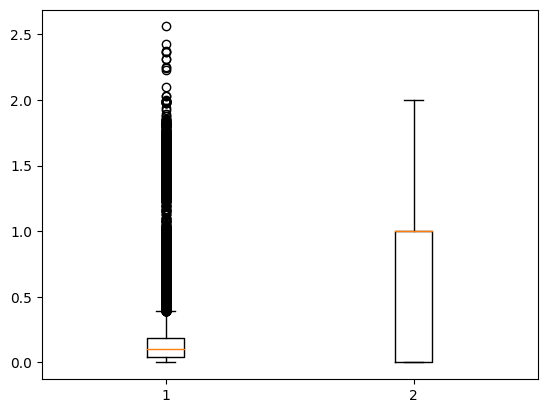

In [133]:
plt.boxplot(comparar)

In [104]:
comparar.to_csv('Distancia_recorreguda_minut_workload_per_nivell', index=False)

In [100]:
comparar = comparar/comparar.max()
comparar.corr()

,distancia_x,distancia_y,workload
distancia_x,1.000000,0.977235,0.154408
distancia_y,0.977235,1.000000,0.033358
workload,0.154408,0.033358,1.000000


In [78]:
comparar = comparar/comparar.max()
comparar.corr()

,blinking_left,blinking_right,workload
blinking_left,1.000000,0.460524,0.075382
blinking_right,0.460524,1.000000,-0.060666
workload,0.075382,-0.060666,1.000000


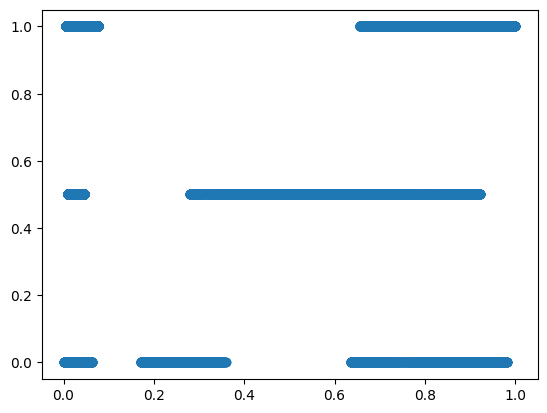

In [79]:
plt.scatter(comparar['blinking_left'], comparar['workload'])

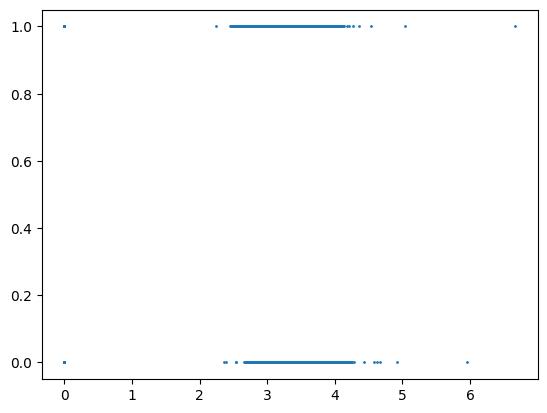

In [50]:
plt.scatter(Guillem_with_level1['eyeleft_pupildiameter'], Guillem_with_level1['workload'], s = 1)

12.823599999999681

In [30]:
d_.corr()

,gaze2d_x,gaze2d_y,eyeleft_pupildiameter,eyeright_pupildiameter,workload
gaze2d_x,1.000000,0.740551,0.641884,0.727083,0.002833
gaze2d_y,0.740551,1.000000,0.585320,0.701507,-0.000225
eyeleft_pupildiameter,0.641884,0.585320,1.000000,0.675150,0.004777
eyeright_pupildiameter,0.727083,0.701507,0.675150,1.000000,0.005516
workload,0.002833,-0.000225,0.004777,0.005516,1.000000


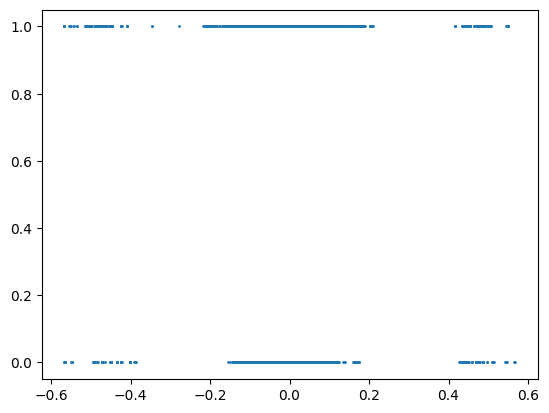

In [32]:
plt.scatter(gaze2d_x, workload, s=1)

<Axes: >

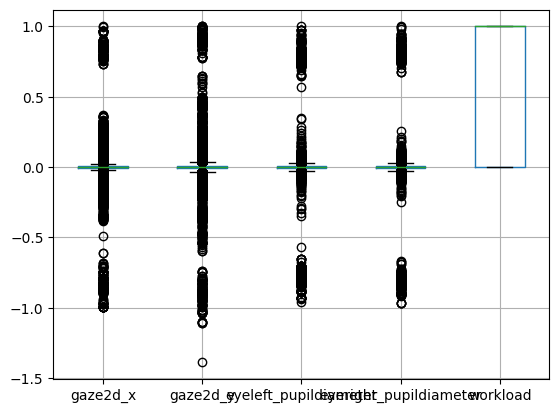

In [34]:
d_.boxplot()

In [36]:
a = pd.DataFrame()
a

""


In [37]:
import ast

In [39]:
eval('Guillem_with_level1')

,timestamp,gaze2d_x,gaze2d_y,eyeleft_pupildiameter,eyeright_pupildiameter,workload
0,2023-10-10 14:53:52.016955000,0.5384,0.4182,3.505,3.503,0
1,2023-10-10 14:53:52.037045000,0.5386,0.4167,3.504,3.501,0
2,2023-10-10 14:53:52.057028000,0.5389,0.4162,3.505,3.503,0
3,2023-10-10 14:53:52.077117000,0.5392,0.4161,3.504,3.501,0
4,2023-10-10 14:53:52.097101000,0.5389,0.4164,3.503,3.509,0
...,...,...,...,...,...,...
29990,2023-10-10 15:03:52.904096000,0.4622,0.5491,2.754,2.730,0
29991,2023-10-10 15:03:52.924183000,0.4621,0.5491,2.752,2.728,0
29992,2023-10-10 15:03:52.944168000,0.4621,0.5490,2.751,2.724,0
29993,2023-10-10 15:03:52.964256000,0.4621,0.5490,2.746,2.719,0


In [44]:
a = pd.concat([a, d_], ignore_index=True, sort=False)

,gaze2d_x,gaze2d_y,eyeleft_pupildiameter,eyeright_pupildiameter,workload
0,0.000100,-0.005900,0.001000,0.000000,0.0
1,-0.000600,-0.004500,0.003000,0.003000,0.0
2,-0.001300,-0.004100,0.005000,0.001000,0.0
3,-0.002500,-0.003600,0.000000,0.005000,0.0
4,-0.002800,-0.003600,-0.001000,-0.006000,0.0
...,...,...,...,...,...
59965,0.000352,0.001982,-0.011936,-0.009152,0.0
59966,0.000176,0.001817,-0.011157,-0.008883,0.0
59967,0.000000,0.001652,-0.010379,-0.009690,0.0
59968,0.000000,0.001652,-0.010379,-0.009690,0.0


In [2]:
df = pd.read_csv('gazedata_csv_definitiu/Aura_with_level1.csv')
interruptions = pd.read_csv('csv_interruptions/Aura_with_level1.csv')

In [9]:
def distancia(x,y):
    return np.sqrt(x**2 + y**2)

In [38]:
gaze2d_x = df['gaze2d_x']
gaze2d_y = df['gaze2d_y']
workload = df['workload']
wl_vel = []
velocitat = []
mean_velocitat = []
mean_wl = []
for i in range(len(gaze2d_x)-10):
    x = gaze2d_x[i+10] - gaze2d_x[i]
    y = gaze2d_y[i+10] - gaze2d_y[i]
    velocitat.append(distancia(x,y)/0.16)
    wl_vel.append(workload[i+10])

for i in range(len(velocitat)-10):
    mean_velocitat.append(np.mean(velocitat[i:i+10]))
    mean_wl.append(np.mean(wl_vel[i:i+10]))


colors = ['grey', 'blue', 'black']

# plt.scatter(range(len()), velocitat, c = colors[wl_vel], s=1)

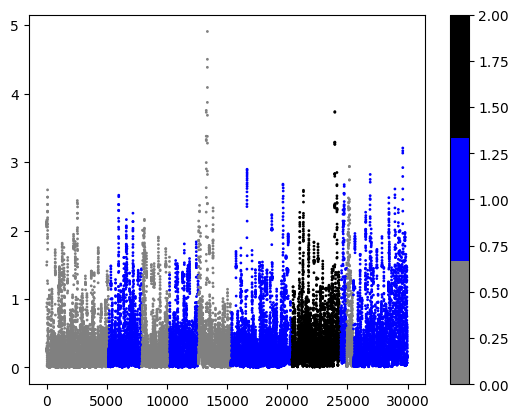

In [39]:
cmap = ListedColormap(['grey', 'blue', 'black'])

plt.scatter(range(len(mean_velocitat)), mean_velocitat, c=mean_wl, cmap=cmap, s=1)
plt.colorbar()

plt.show()

In [7]:
df_ = df.drop('timestamp', axis=1)

In [8]:
df_.corr() # Fer variació de pupila i blinking

,gaze2d_x,gaze2d_y,eyeleft_pupildiameter,eyeright_pupildiameter,workload
gaze2d_x,1.000000,0.489704,0.249050,0.660928,0.042350
gaze2d_y,0.489704,1.000000,0.354274,0.408046,-0.261132
eyeleft_pupildiameter,0.249050,0.354274,1.000000,0.168186,-0.122604
eyeright_pupildiameter,0.660928,0.408046,0.168186,1.000000,0.148739
workload,0.042350,-0.261132,-0.122604,0.148739,1.000000
